**Topic:** Historical Value at Risk  
**Autor:** George Estrella Valverde  
**Date:** January 11, 2025  
***

## Historical Value at Risk

#### Defining Historical Value at Risk
Value at risk is a loss that we are fairly sure will not be exceeded if the current portfolio is held over some period of time.  
VaR is measured at the portfolio level, without considering the mapping of portfolios to their risk factors  

#### Basic Parameters of Historical Value at Risk  
##### Significance level $(\alpha)$ or confidence level $(1-\alpha)$
* Set by external regulators or based on the user's risk appetite.
* Examples:
    * Basel II regulation: 1% significance level (99% confidence level).
    * Credit rating agencies: May require stricter levels, e.g., 0.03% significance (99.97%).  

##### Risk Horizon $h$
* The time period over wich VaR is measured, typically in trading days
* Examples:
    * Basel II regulation: 10-day horizon.  
    * Adjusted based on asset liquidity and market conditions.

#### Defining Historical Value at Risk
Value at risk is a loss that we are fairly sure will not be exceeded if the current portfolio is held over some period of time.  
VaR is measured at the portfolio level, without considering the mapping of portfolios to their risk factors  

#### Basic Parameters of Historical Value at Risk  
##### Significance level $(\alpha)$ or confidence level $(1-\alpha)$
* Set by external regulators or based on the user's risk appetite.
* Examples:
    * Basel II regulation: 1% significance level (99% confidence level).
    * Credit rating agencies: May require stricter levels, e.g., 0.03% significance (99.97%).  

##### Risk Horizon $h$
* The time period over wich VaR is measured, typically in trading days
* Examples:
    * Basel II regulation: 10-day horizon.  
    * Adjusted based on asset liquidity and market conditions.

**Definición Matemática del Valor en Riesgos Histórico con Retornos Logarítmicos**

El **VaR Histórico** con retornos logarítmicos se define de la siguiente manera:

1. **Cálculo de Retornos Logarítmicos**:
   $$ r_{t} = \ln\left(\frac{P_t}{P_{t-1}}\right) = p_t - p_{t-1}$$
   donde:
   - $ P_t $: Precio del activo o portafolio en el tiempo $ t $.
   - $ P_{t-1} $: Precio del activo o portafolio en el tiempo $ t-1 $.
   - $ p_{t} $: Precio logarítmico $ t $.
   - $ p_{t-1} $: Precio logaritmico en el tiempo $ t-1 $.  

2. **Ordenamiento de Retornos**:
   Ordenar los retornos logarítmicos $ r_{t} $ de menor a mayor.

3. **Cálculo del Percentil**:
   Determinar el percentil empírico correspondiente al nivel de confianza deseado $ \alpha $. Por ejemplo, para un nivel de confianza del 95% ($ \alpha = 0.95 $), se busca el percentil del $ 1-\alpha $ (5%).

4. **Fórmula del VaR Histórico**:
   $$ \text{VaR}_{\alpha} = -\text{Percentil}_{1-\alpha}(r_{t}) $$

5. **Posición del Percentil**:
   Si se tienen $ n $ observaciones de $ r_{t} $, la posición del percentil $ 1-\alpha $ se calcula como:
   $$ k = \lceil (1-\alpha) \cdot n \rceil $$
   El retorno logarítmico en esta posición ($ r_{(k)} $) se utiliza para calcular el VaR:
   $$ \text{VaR}_{\alpha} = -r_{(k)} $$



In [21]:
# Libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import Data from YahooFinance API
# Microsoft Inc.
data = yf.download('MSFT', '2005-01-01', '2025-01-03')['Close']
data = data.reset_index()
data.rename(columns={'Close':'Price'}, inplace=True)
data['Daily_Log_Return'] = np.log(data['Price']/data['Price'].shift(1))

# Additive property
data['Weekly_Log_Return'] = data['Daily_Log_Return'].rolling(window=5).sum()
data['Monthly_Log_Return'] = data['Daily_Log_Return'].rolling(window=22).sum()
data['Annual_Log_Return'] = data['Daily_Log_Return'].rolling(window=252).sum()

# Daily HVaR
Daily_HVaR = np.percentile(data['Daily_Log_Return'].dropna(), (1 - 0.995) * 100)
print(f'Daily VaR: {Daily_HVaR:.4f}')

# Weekly HVaR
Weekly_HVaR = np.percentile(data['Weekly_Log_Return'].dropna(), (1 - 0.995) * 100)
print(f'Weekly VaR: {Weekly_HVaR:.4f}')

# Monthly HVaR
Monthly_HVaR = np.percentile(data['Monthly_Log_Return'].dropna(), (1 - 0.995) * 100)
print(f'Monthly VaR: {Monthly_HVaR:.4f}')

# Annual HVaR
Annual_HVaR = np.percentile(data['Annual_Log_Return'].dropna(), (1 - 0.995) * 100)
print(f'Annual VaR: {Annual_HVaR:.4f}')

[*********************100%%**********************]  1 of 1 completed

Daily VaR: -0.0583
Weekly VaR: -0.1168
Monthly VaR: -0.1811
Annual VaR: -0.5814


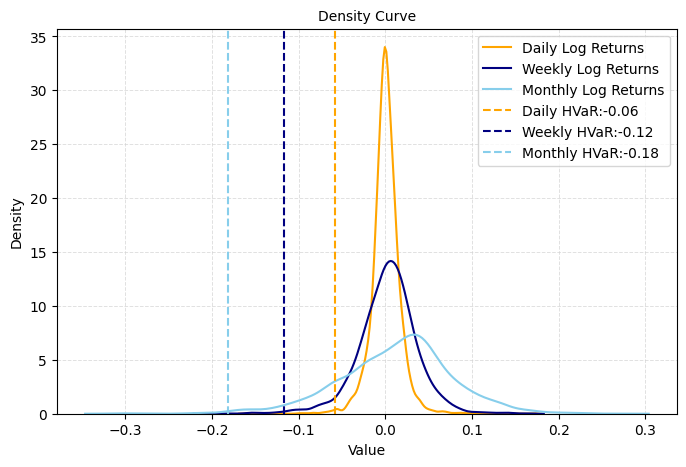

In [3]:

# Size and Background
plt.figure(figsize=(8, 5))
#plt.gca().set_facecolor('#f5f5f5')
plt.grid(color='lightgray', linestyle='--', linewidth=0.7, alpha=0.7)

# Densisty Curve
sns.kdeplot(data['Daily_Log_Return'], color='orange', label='Daily Log Returns')
sns.kdeplot(data['Weekly_Log_Return'], color='navy', label='Weekly Log Returns')
sns.kdeplot(data['Monthly_Log_Return'], color='skyblue', label='Monthly Log Returns')

# Historical Value at Risk
plt.axvline(x=Daily_HVaR, color='orange', linestyle='--', linewidth=1.5, label=f'Daily HVaR:{Daily_HVaR:.2f}')
plt.axvline(x=Weekly_HVaR, color='navy', linestyle='--', linewidth=1.5, label=f'Weekly HVaR:{Weekly_HVaR:.2f}')
plt.axvline(x=Monthly_HVaR, color='skyblue', linestyle='--', linewidth=1.5, label=f'Monthly HVaR:{Monthly_HVaR:.2f}')

# Titles
plt.title('Density Curve', fontsize = 10)
plt.xlabel('Value',fontsize=10)
plt.ylabel('Density',fontsize=10)
plt.legend(frameon=True)
plt.show()

In [4]:
import yfinance as yf
import numpy as np
import pandas as pd

def historical_VaR(tickers, start_date, end_date, frequency, confidence_level):
    """
    Calculate Historical Value at Risk (VaR) for given tickers, date range, frequency, and confidence level.
    
    Parameters:
        tickers (list): List of stock tickers.
        start_date (str): Start date in 'YYYY-MM-DD' format.
        end_date (str): End date in 'YYYY-MM-DD' format.
        frequency (str): 'daily', 'weekly', 'monthly', or 'annual'.
        confidence_level (float): Confidence level (e.g., 0.95 for 95% confidence).
        
    Returns:
        pd.DataFrame: DataFrame containing Historical VaR values for the given frequency.
    """
    # Map frequency to rolling window size
    freq_map = {'daily': 1, 'weekly': 5, 'monthly': 22, 'annual': 252}
    if frequency not in freq_map:
        raise ValueError("Frequency must be 'daily', 'weekly', 'monthly', or 'annual'.")
    
    # Download close prices
    prices = yf.download(tickers, start=start_date, end=end_date)['Close']
    if isinstance(prices, pd.Series) and len(tickers) == 1:
        prices = prices.to_frame(name=tickers[0])
    
    # Calculate logarithmic returns
    log_returns = np.log(prices / prices.shift(1))
    rolling_returns = log_returns.rolling(window=freq_map[frequency]).sum()
    
    # Calculate Historical VaR
    historicalVaR_dict = {
        ticker: {f"{frequency.capitalize()}_HVaR": np.percentile(rolling_returns[ticker].dropna(), (1 - confidence_level) * 100)}
        for ticker in tickers
    }
    
    # Convert result dictionary to DataFrame
    historicalVaR_df = pd.DataFrame(historicalVaR_dict).T.reset_index(names='Ticker').sort_values('Ticker').reset_index(drop=True)
    
    return historicalVaR_df

In [5]:
tickers = ['AMZN', 'AAPL', 'NVDA', 'TSLA', 'INTC', 'META', 'MSFT', 'GOOGL', 'JPM', 'NFLX', 'COST', 'BAC']
start_date = '2005-01-01'
end_date = '2025-01-03'
frecuency = 'weekly'
confidence_level = 0.995

H_VaR = historical_VaR(tickers, start_date, end_date, frecuency, confidence_level)
print(H_VaR)

[*********************100%%**********************]  12 of 12 completed

   Ticker  Weekly_HVaR
0    AAPL    -0.138314
1    AMZN    -0.169359
2     BAC    -0.291497
3    COST    -0.110309
4   GOOGL    -0.128084
5    INTC    -0.156177
6     JPM    -0.156443
7    META    -0.210178
8    MSFT    -0.116800
9    NFLX    -0.273324
10   NVDA    -0.223663
11   TSLA    -0.231963


In [23]:
import yfinance as yf
import numpy as np
import pandas as pd

def historical_VaR(tickers, start_date, end_date, frequency, confidence_level):
    """
    Calculate Historical Value at Risk (VaR) for given tickers, date range, frequency, and confidence level.

    Parameters:
        tickers (list): List of stock tickers.
        start_date (str): Start date in 'YYYY-MM-DD' format.
        end_date (str): End date in 'YYYY-MM-DD' format.
        frequency (str): 'daily', 'weekly', 'monthly', or 'annual'.
        confidence_level (float): Confidence level (e.g., 0.95 for 95% confidence).

    Returns:
        pd.DataFrame: DataFrame containing Historical VaR values for the given frequency.
    """
    # Map frequency to rolling window size
    freq_map = {'daily': 1, 'weekly': 5, 'monthly': 22, 'annual': 252}
    if frequency not in freq_map:
        raise ValueError("Frequency must be 'daily', 'weekly', 'monthly', or 'annual'.")

    # Download close prices
    prices = yf.download(tickers, start=start_date, end=end_date)['Close']
    if isinstance(prices, pd.Series) and len(tickers) == 1:
        prices = prices.to_frame(name=tickers[0])

    # Calculate logarithmic returns
    log_returns = np.log(prices / prices.shift(1))
    rolling_returns = log_returns.rolling(window=freq_map[frequency]).sum()

    # Initialize list to store results
    results = []

    # Calculate Historical VaR for each ticker
    for ticker in tickers:
        if ticker in rolling_returns.columns:
            hvar = np.percentile(rolling_returns[ticker].dropna(), (1 - confidence_level) * 100)
            results.append([ticker, f"{frequency.capitalize()}_HVaR", hvar])

    # Convert list to DataFrame
    historicalVaR_df = pd.DataFrame(results, columns=['Ticker', 'Metric', 'Value'])

    return historicalVaR_df

# Example usage
tickers = ['AAPL', 'MSFT', 'GOOGL']
start_date = '2020-01-01'
end_date = '2023-01-01'
frequency = 'monthly'
confidence_level = 0.95

historical_var_df = historical_VaR(tickers, start_date, end_date, frequency, confidence_level)
print(historical_var_df)


[*********************100%%**********************]  3 of 3 completed

  Ticker        Metric     Value
0   AAPL  Monthly_HVaR -0.138669
1   MSFT  Monthly_HVaR -0.122196
2  GOOGL  Monthly_HVaR -0.158060


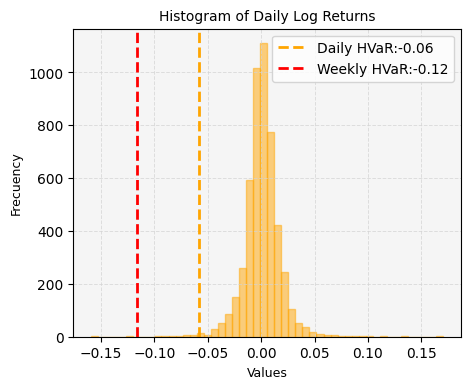

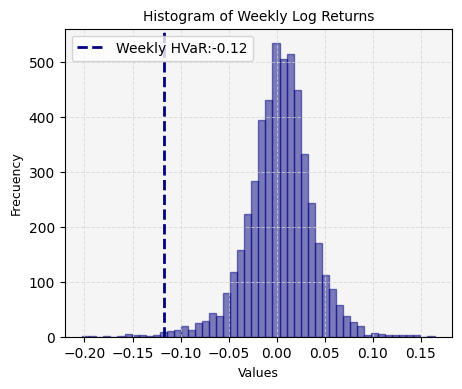

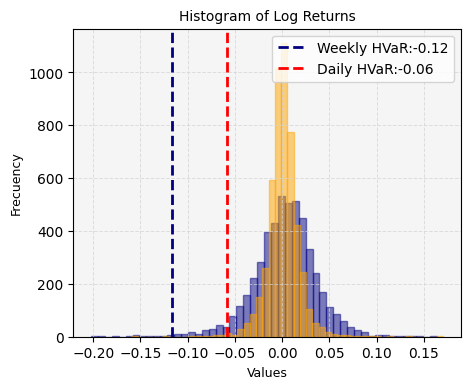

In [19]:
# Histogram
#plt.figure(figsize=(7, 6))
plt.figure(figsize=(5, 4))
plt.gca().set_facecolor('#f5f5f5')
plt.grid(color='lightgray', linestyle='--', linewidth=0.7, alpha=0.7)
plt.title('Histogram of Daily Log Returns', fontsize = 10)
plt.hist(data['Daily_Log_Return'].dropna(), bins=50,alpha=0.5, color='orange', edgecolor='orange')
# Historical Value at Risk
plt.axvline(x=Daily_HVaR, color='orange', linestyle='--', linewidth=2.0, label=f'Daily HVaR:{Daily_HVaR:.2f}')
plt.axvline(x=Weekly_HVaR, color='red', linestyle='--', linewidth=2.0, label=f'Weekly HVaR:{Weekly_HVaR:.2f}')
plt.xlabel('Values',fontsize=9)
plt.ylabel('Frecuency',fontsize=9)
plt.legend()
plt.show()

# Histogram
#plt.figure(figsize=(7, 6))
plt.figure(figsize=(5, 4))
plt.gca().set_facecolor('#f5f5f5')
plt.grid(color='lightgray', linestyle='--', linewidth=0.7, alpha=0.7)
plt.title('Histogram of Weekly Log Returns', fontsize = 10)
plt.hist(data['Weekly_Log_Return'].dropna(), bins=50,alpha=0.5, color='navy', edgecolor='navy')
plt.axvline(x=Weekly_HVaR, color='navy', linestyle='--', linewidth=2.0, label=f'Weekly HVaR:{Weekly_HVaR:.2f}')
plt.xlabel('Values',fontsize=9)
plt.ylabel('Frecuency',fontsize=9)
plt.legend()
plt.show()

# Histogram
plt.figure(figsize=(5, 4))
plt.gca().set_facecolor('#f5f5f5')
plt.grid(color='lightgray', linestyle='--', linewidth=0.7, alpha=0.7)
plt.title('Histogram of Log Returns', fontsize = 10)
# Weekly Log Return and Weekly HVaR
plt.hist(data['Weekly_Log_Return'].dropna(), bins=50,alpha=0.5, color='navy', edgecolor='navy')
plt.axvline(x=Weekly_HVaR, color='navy', linestyle='--', linewidth=2.0, label=f'Weekly HVaR:{Weekly_HVaR:.2f}')
# Daily Log Return and Daily HVaR
plt.hist(data['Daily_Log_Return'].dropna(), bins=50,alpha=0.5, color='orange', edgecolor='orange')
plt.axvline(x=Daily_HVaR, color='red', linestyle='--', linewidth=2.0, label=f'Daily HVaR:{Daily_HVaR:.2f}')
plt.xlabel('Values',fontsize=9)
plt.ylabel('Frecuency',fontsize=9)
plt.legend()
plt.show()

### Herramienta de Riesgos  
Primera herramienta de riesgo

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd

def historical_VaR(tickers, start_date, end_date, frequency, confidence_level):
    """
    Calculate Historical Value at Risk (VaR) for given tickers, date range, frequency, and confidence level.
    
    Parameters:
        tickers (list): List of stock tickers.
        start_date (str): Start date in 'YYYY-MM-DD' format.
        end_date (str): End date in 'YYYY-MM-DD' format.
        frequency (str): 'daily', 'weekly', 'montlhy' or 'annual'.
        confidence_level (float): Confidence level (e.g., 0.95 for 95% confidence).
        
    Returns:
        pd.DataFrame: DataFrame containing Historical VaR values for the given frequency.
    """
    # Close Prices
    prices = yf.download(tickers, start=start_date, end=end_date)['Close']
    
    # Conditional for one Ticker
    if isinstance(prices, pd.Series) and len(tickers) == 1:
        prices = prices.to_frame(name=tickers[0])
    
    # Logarithmic Returns
    log_returns = np.log(prices / prices.shift(1))
    
    # Initialize result dictionary
    historicalVaR_dict = {ticker: {} for ticker in tickers}
    
    # Daily Historical Value at Risk
    if frequency == 'daily':
        for ticker in tickers:
            var = np.percentile(log_returns[ticker].dropna(), (1 - confidence_level) * 100)
            historicalVaR_dict[ticker]['Daily_HVaR'] = var
            
    # Weekly Historical Value at Risk
    elif frequency == 'weekly':
        weekly_log_returns = log_returns.rolling(window=5).sum()
        for ticker in tickers:
            var = np.percentile(weekly_log_returns[ticker].dropna(), (1 - confidence_level) * 100)
            historicalVaR_dict[ticker]['Weekly_HVaR'] = var

    # Monthly Historical Value at Risk
    elif frequency == 'monthly':
        monthly_log_returns = log_returns.rolling(window=22).sum()
        for ticker in tickers:
            var = np.percentile(monthly_log_returns[ticker].dropna(), (1 - confidence_level) * 100)
            historicalVaR_dict[ticker]['Annual_HVaR'] = var

    # Annual Historical Value at Risk
    elif frequency == 'annual':
        annual_log_returns = log_returns.rolling(window=252).sum()
        for ticker in tickers:
            var = np.percentile(annual_log_returns[ticker].dropna(), (1 - confidence_level) * 100)
            historicalVaR_dict[ticker]['Annual_HVaR'] = var
    
    # Convert result dictionary to DataFrame
    historicalVaR_df = pd.DataFrame(historicalVaR_dict).T.reset_index(names='Ticker').sort_values('Ticker').reset_index(drop=True)
    
    return historicalVaR_df


In [ ]:
tickers = ['AMZN', 'AAPL', 'NVDA', 'TSLA', 'INTC', 'META', 'MSFT', 'GOOGL', 'JPM', 'NFLX', 'COST', 'BAC']
start_date = '2005-01-01'
end_date = '2025-01-03'
frecuency = 'monthly'
confidence_level = 0.995

H_VaR = historical_VaR(tickers, start_date, end_date, frecuency, confidence_level)
H_VaR

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd

def historical_VaR(tickers, start_date, end_date, frequency, confidence_level):
    """
    Calculate Historical Value at Risk (VaR) for given tickers, date range, frequency, and confidence level.
    
    Parameters:
        tickers (list): List of stock tickers.
        start_date (str): Start date in 'YYYY-MM-DD' format.
        end_date (str): End date in 'YYYY-MM-DD' format.
        frequency (str): 'daily', 'weekly', 'monthly', or 'annual'.
        confidence_level (float): Confidence level (e.g., 0.95 for 95% confidence).
        
    Returns:
        pd.DataFrame: DataFrame containing Historical VaR values for the given frequency.
    """
    # Map frequency to rolling window size
    freq_map = {'daily': 1, 'weekly': 5, 'monthly': 22, 'annual': 252}
    if frequency not in freq_map:
        raise ValueError("Frequency must be 'daily', 'weekly', 'monthly', or 'annual'.")
    
    # Download close prices
    prices = yf.download(tickers, start=start_date, end=end_date)['Close']
    if isinstance(prices, pd.Series) and len(tickers) == 1:
        prices = prices.to_frame(name=tickers[0])
    
    # Calculate logarithmic returns
    log_returns = np.log(prices / prices.shift(1))
    rolling_returns = log_returns.rolling(window=freq_map[frequency]).sum()
    
    # Calculate Historical VaR
    historicalVaR_dict = {
        ticker: {f"{frequency.capitalize()}_HVaR": np.percentile(rolling_returns[ticker].dropna(), (1 - confidence_level) * 100)}
        for ticker in tickers
    }
    
    # Convert result dictionary to DataFrame
    historicalVaR_df = pd.DataFrame(historicalVaR_dict).T.reset_index(names='Ticker').sort_values('Ticker').reset_index(drop=True)
    
    return historicalVaR_df


In [ ]:
# Function
import pandas as pd
import numpy as np
import yfinance as yf

def historicalVaR(tickers, start_date, end_date, var_days_list, confidence_level):
    # Close Prices
    prices = yf.download(tickers, start=start_date, end=end_date)['Close']
    
    # Conditional for one Ticker
    if isinstance(prices, pd.Series) and len(tickers) == 1:
        prices = prices.to_frame(name=tickers[0])
    
    # DataFrame
    h_var_dict = {ticker: {} for ticker in tickers}
    
    for var_days in var_days_list:
        rets = np.log(prices / prices.shift(var_days))
        for ticker in rets.columns:
            var = np.percentile(rets[ticker].dropna(), (1 - confidence_level) * 100)
            h_var_dict[ticker][f'HVaR_{var_days}'] = var
    
    # To Dictionary to DataFrame
    h_var_df = pd.DataFrame.from_dict(h_var_dict, orient='index').reset_index()
    h_var_df.rename(columns={'index': 'Ticker'}, inplace=True)
    h_var_df.sort_values(by='Ticker', ascending=True, inplace=True)
    h_var_df.reset_index(drop=True, inplace=True)
    
    return h_var_df

In [ ]:
# Weekly Historical Value at Risk
tickers = ['AMZN', 'AAPL', 'NVDA', 'TSLA', 'INTC', 'META', 'MSFT', 'GOOGL', 'JPM', 'NFLX', 'COST', 'BAC']
start_date = '2005-01-01'
end_date = '2025-01-03'
var_days = [1, 5, 252]
confidence_level = 0.995

h_var = historicalVaR(tickers, start_date, end_date, var_days, confidence_level)
h_var